In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
%matplotlib notebook

In [86]:
# define constants
G = 6.67*10**(-11) # in SI units
M = 6*10**30 # kg idk, stereotypical mass of three solar masses i guess
c = 3*10**8 # meters/second
dt = 0.01
t = np.arange(0,700,dt)


# initial condition
x = 1e7 #m
y = 1e7 #m
vx = 220000 #m/s
vy = 0 #m/s

In [87]:
x_array = [x]
y_array = [y]
for i in range(len(t)):
    a = -G*M/(x**2+y**2)
    a_x = a * x / np.sqrt(x**2+y**2)
    a_y = a * y / np.sqrt(x**2+y**2)
    vx = vx + a_x * dt
    vy = vy + a_y * dt
    if x >= 0 :
        x = x + vx * dt
    if y >= 0:
        y = y + vy * dt
    if x < 0 and y < 0:
        break
    x_array.append(x)
    y_array.append(y)

<IPython.core.display.Javascript object>


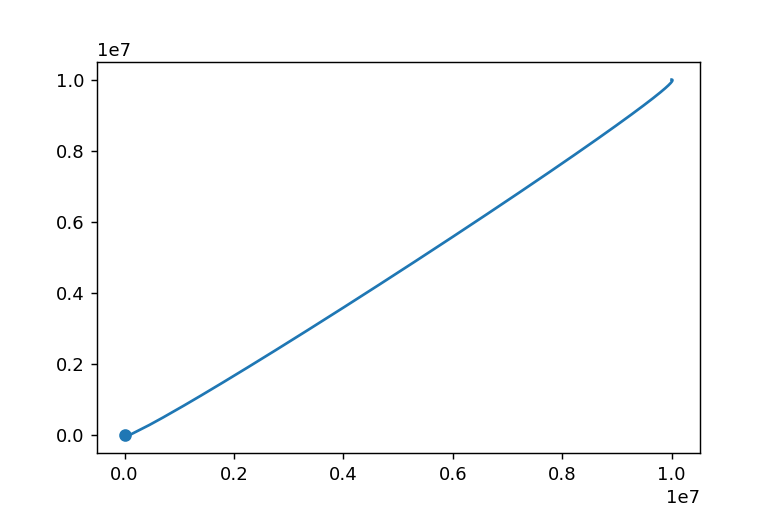

In [88]:
plt.figure()
plt.plot(x_array, y_array)
plt.scatter(0,0)

<IPython.core.display.Javascript object>


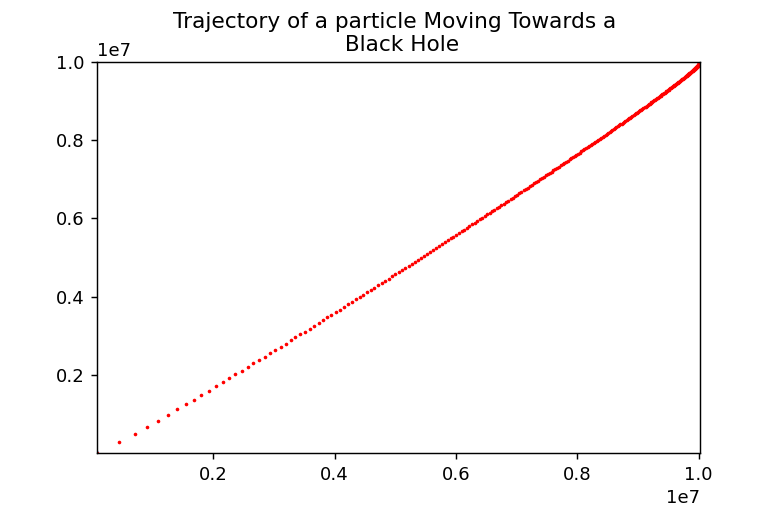

In [105]:
fig, ax = plt.subplots()
line, = ax.plot([], [], 'ro',markersize=1)
ax.set_xlim(min(x_array) - 500, max(x_array) + 500)
ax.set_ylim(min(y_array) - 500, max(y_array) + 500)
def init():
    ax.scatter(0,0, s = 1)
    line.set_data([], [])
    return line,
def update(frame):
    ax.scatter(0,0, s = 1)
    line.set_data(x_array[:frame], y_array[:frame])
    return line,
ax.title.set_text('Trajectory of a particle Moving Towards a \n Black Hole')
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, repeat=False, interval = 10)
ax.scatter(0,0)
plt.show()

<IPython.core.display.Javascript object>


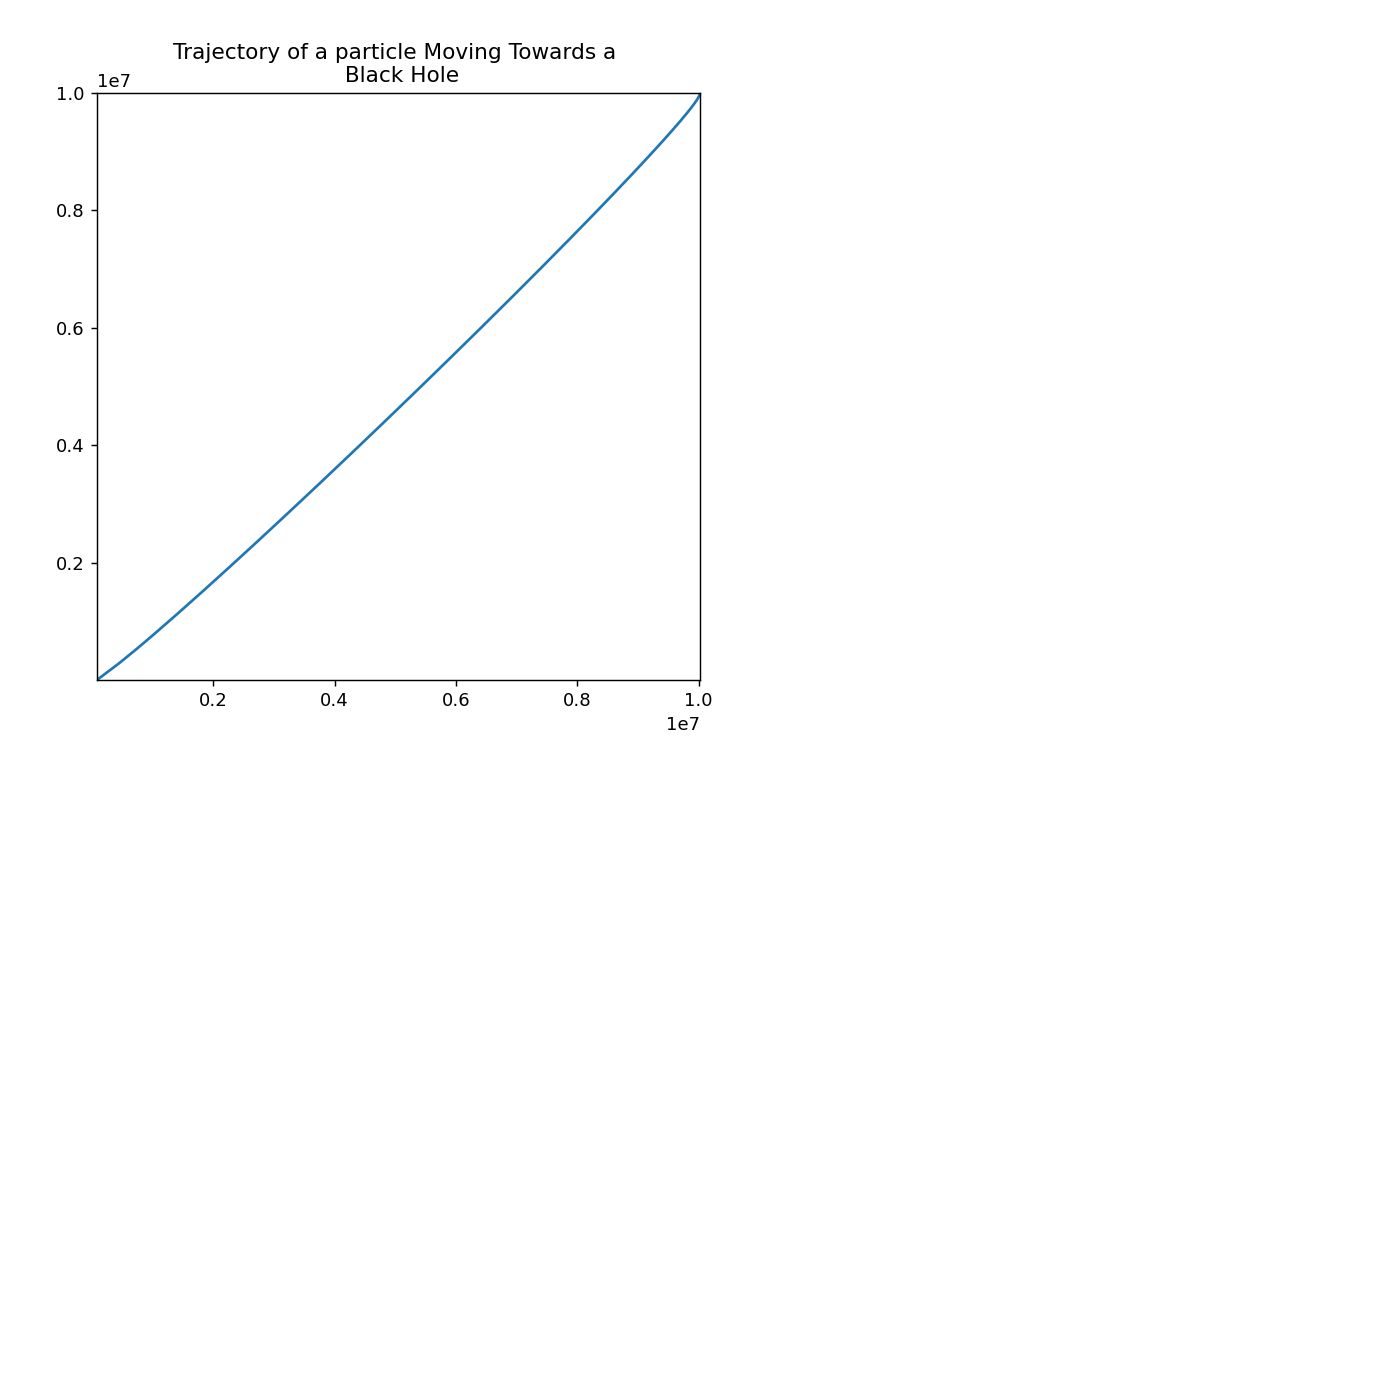

In [92]:
fig, ax = plt.subplots()
fig.set_figheight(6)
ax.set_xlim(min(x_array) - 500, max(x_array) + 500)
ax.set_ylim(min(y_array) - 500, max(y_array) + 500)

#ax.plot(rvals, velocity, label="velocity of photon", color = "gold")

#ax.vlines(r_s, -2*10**7, 12*10**7, label = "schwarzschild radius", color="green")

animated_plot1, = ax.plot([],[], label="position of photon")
ax.title.set_text('Trajectory of a particle Moving Towards a \n Black Hole')
#animation
def animate(frame):
    animated_plot1.set_data(x_array[:frame], y_array[:frame])
    return animated_plot1

ani = animation.FuncAnimation(fig = fig, func = animate, repeat=False, init_func=init, 
                                    frames= len(x_array), blit = True)
plt.show()
